<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriring: kriging convolution 1D </font>
</div>

- **Fecha**: 2022/11/11
        
- **Objetivos**: Kriging standard
- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [325]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [326]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [327]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 200


# Theoretical variogram 



In [328]:
from phyton_kriging import np, sp, plt

from phyton_kriging.variogram_1D import theoretical, experimental
from phyton_kriging.convolution_1D import Convolution_1D

In [329]:
h = np.linspace(0, 10, 1000)


name = gauss

h: min - 0.0, max - 10.0
variogram: min - 0.0006250000000000001, max - 0.3010837208182722
parameters = {'sc': 0.025, 'A': 0.3010398644698074, 'lc': 4, 'power': None}



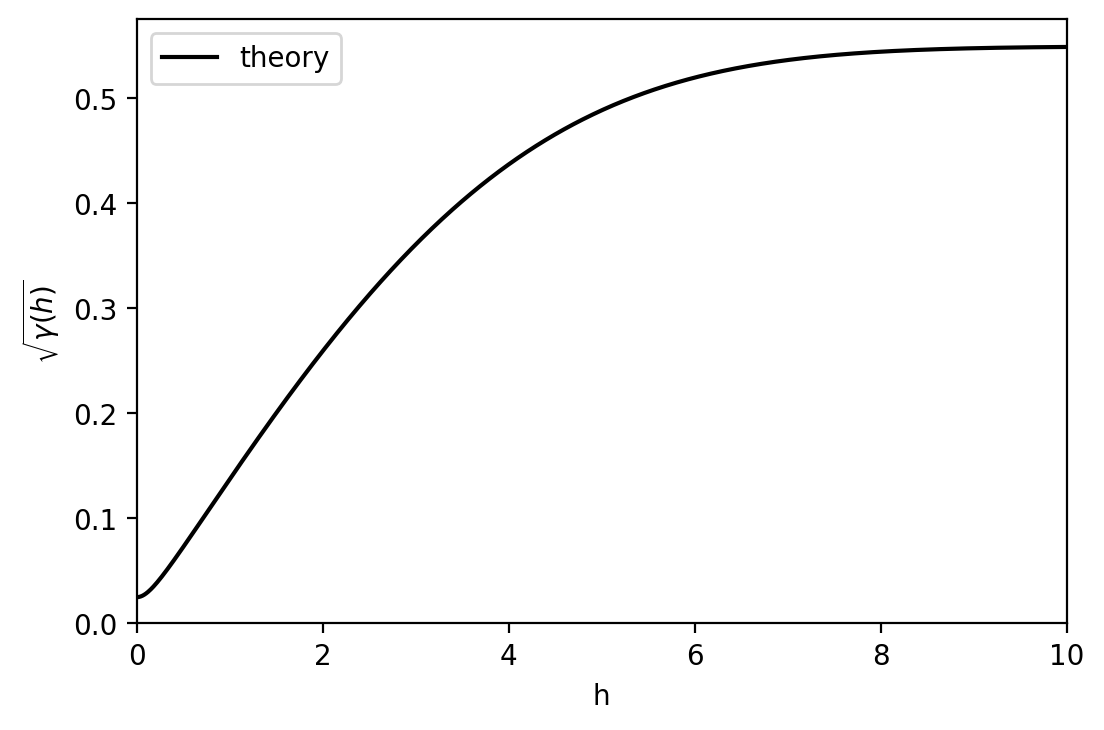

In [330]:
sc = .025
I0 = 0.00025

var_theo = theoretical(h=h)
#var_theo.gauss(sc=sc, A=1, lc=1.25)
var_theo.gauss(sc=sc, A=np.sqrt(.3**2 + sc**2), lc=4)

var_theo.draw()
print(var_theo)

In [331]:
def f_signal(x, sc=0, I0=0):
    """Simulation of data

    Args:
        x (np.array): x_positions
        sc (float or np.array): random noise
        I0 (float or np.array): detector precision

    Returns:
        y (np.array): data.
    """
    num_sensors = len(x)

    y=np.cos(2 * np.pi * x / 10)
    y= np.exp(-x**2 / (2 * 2**2))

    y=y + sc * np.random.randn(num_sensors)
    y = y + 2*I0 * (np.random.rand(num_sensors)-0.5)

    return y

In [332]:
num_sensors = 500
num_sampling = num_sensors
sampling = np.linspace(-10, 10, num_sampling)

y_ideal = f_signal(sampling,0,0)


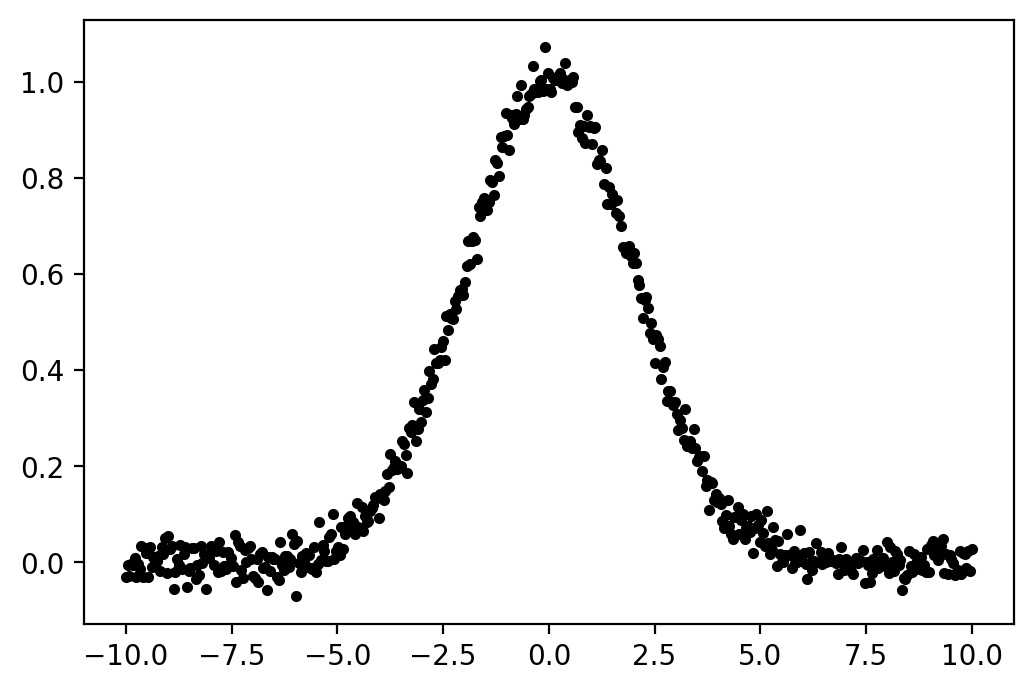

In [333]:

sensors = np.zeros((num_sensors, 3), dtype=float)

x = -10 + 20 * np.random.rand(num_sensors)
x = np.linspace(-10, 10, num_sensors)
x = np.sort(x)
sensors[:, 0] = x
sensors[:, 1] = f_signal(x, sc, I0)
sensors[:, 2] = I0 * np.ones_like(sensors[:, 0])


plt.plot(sensors[:, 0], sensors[:, 1], 'k.')

In [334]:
h = np.linspace(0, 10, 200)
var_exp = experimental(x=sensors[:, 0], y=sensors[:, 1])
var_exp.compute(ipoints=np.arange(0, 500))
h_exp = var_exp.h
var_exp_data = var_exp.variogram

In [335]:
var_theo = theoretical(h=h)
var_theo.gauss(sc=sc, A=np.sqrt(.25**2 + sc**2), lc=4)



name = gauss

h: min - 0.0, max - 10.0
variogram: min - 0.0006250000000000001, max - 0.25138686992898807
parameters = {'sc': 0.025, 'A': 0.25124689052802224, 'lc': 4, 'power': None}



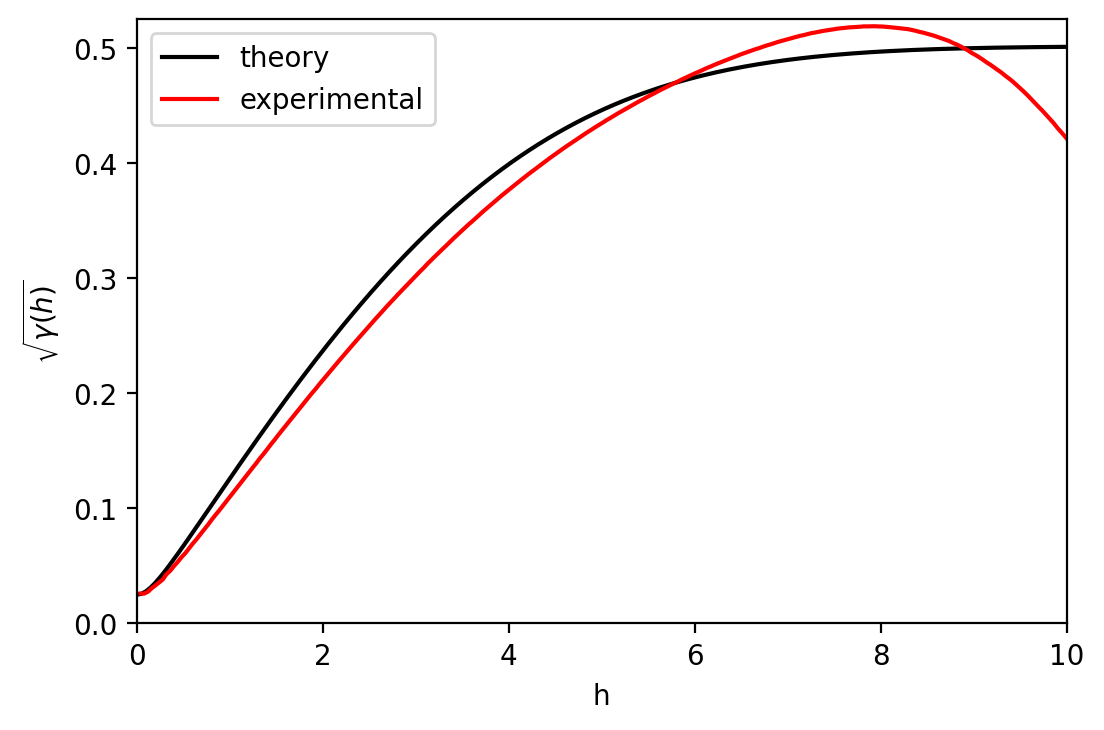

In [336]:
var_theo.draw()
plt.plot(h_exp, np.sqrt(var_exp_data), 'r', label='experimental')
plt.legend()
print(var_theo)

In [337]:
krig1 = Convolution_1D(sensors=sensors, variogram=var_theo, sampling=sampling)
krig1.y_ideal=y_ideal


In [338]:
krig1.standard()

error_real = krig1.estimation - y_ideal

In [339]:
krig1.center_lambdas()
krig1.compute_DM()
krig1.normalize_DM()

In [340]:
krig1.draw(kind='sensor')

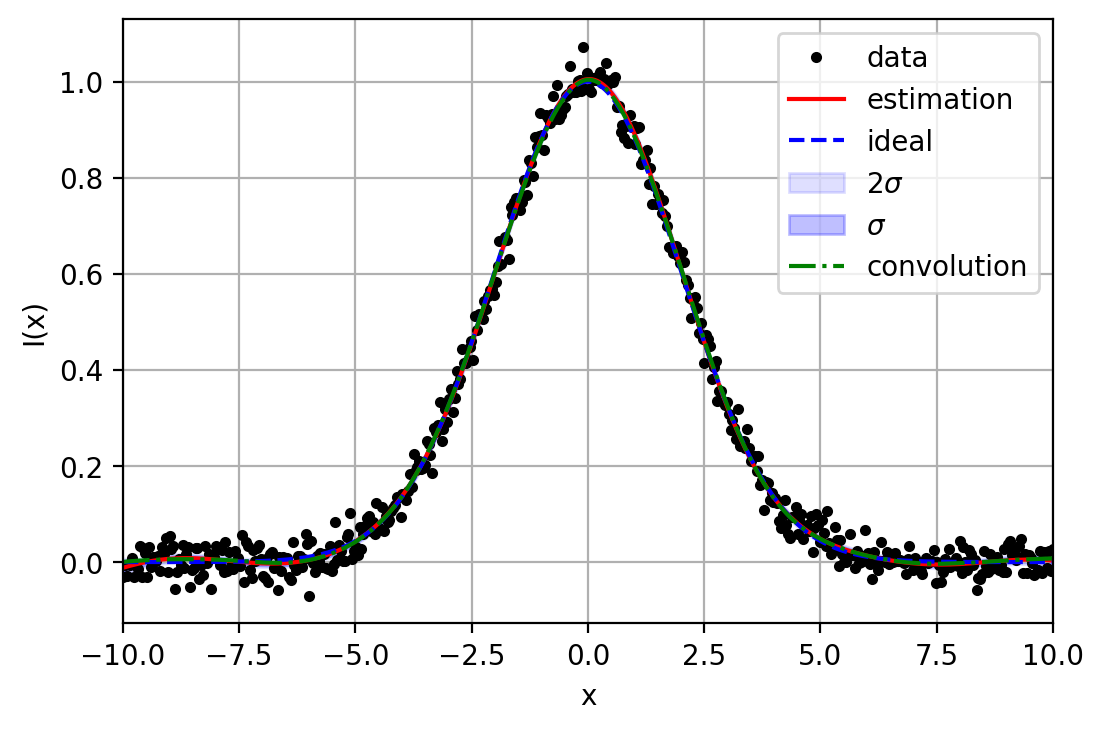

In [341]:
estimation_conv = krig1.compute_estimation()

krig1.draw(kind='kriging')
plt.plot(krig1.sampling, estimation_conv, 'g-.',label='convolution')
plt.legend()


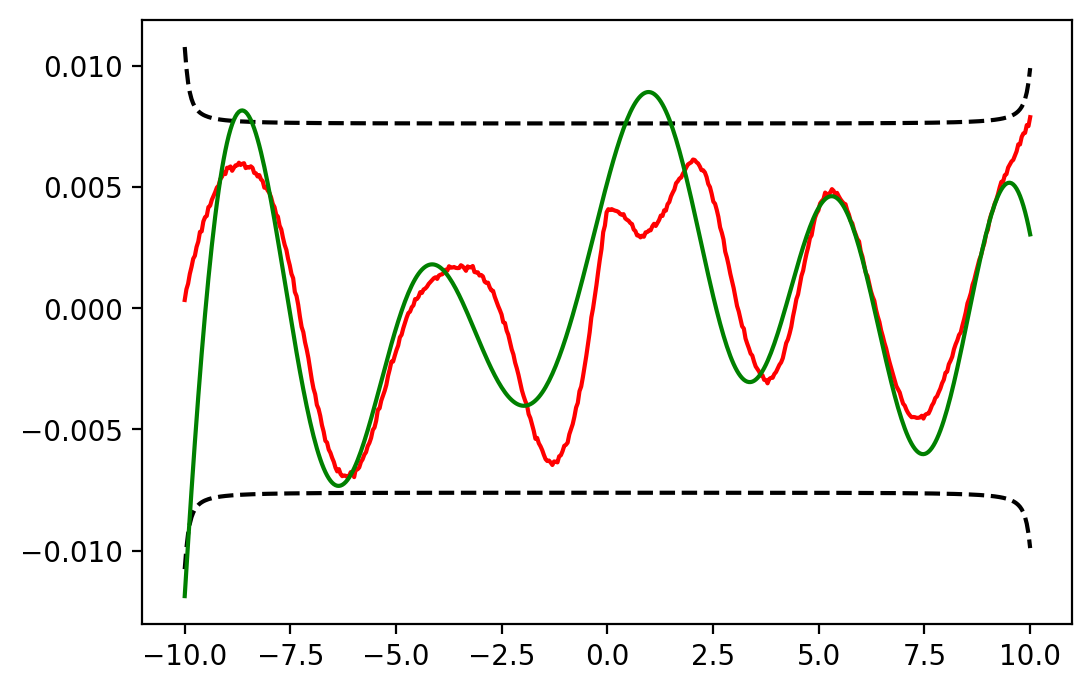

In [342]:
error0 = krig1.estimation-y_ideal
error2 =  krig1.estimation_conv -y_ideal
error1 = krig1.compute_error()


plt.plot(krig1.sampling,error1,'k--')
plt.plot(krig1.sampling, -error1, 'k--')
plt.plot(krig1.sampling, error2, 'r')
plt.plot(krig1.sampling, error0, 'g')


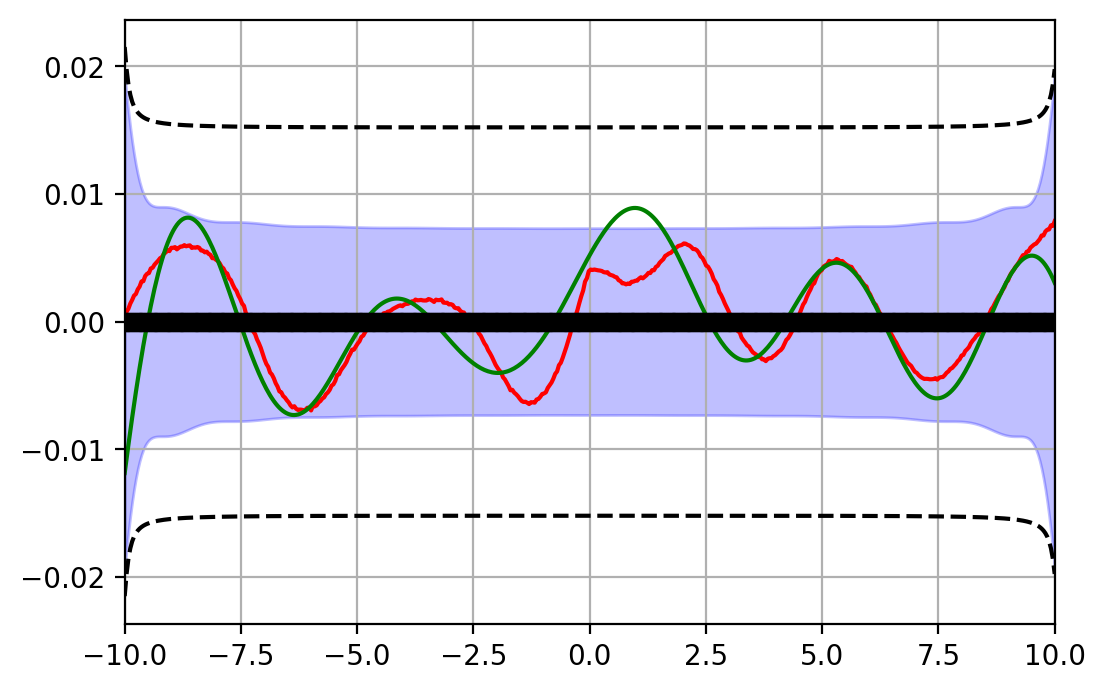

In [343]:
plt.plot(krig1.sampling, error2, 'r')
plt.plot(krig1.sampling, error0, 'g')
plt.plot(sensors[:, 0], np.zeros_like(sensors[:, 0]), 'ko')

plt.fill_between(sampling, - 2*krig1.error, 2*krig1.error, color='blue', alpha=0.25)
plt.plot(sampling, 2*krig1.error_conv, 'k--')
plt.plot(sampling, -2*krig1.error_conv, 'k--')
plt.xlim(sampling[0], sampling[-1])
plt.grid('on')


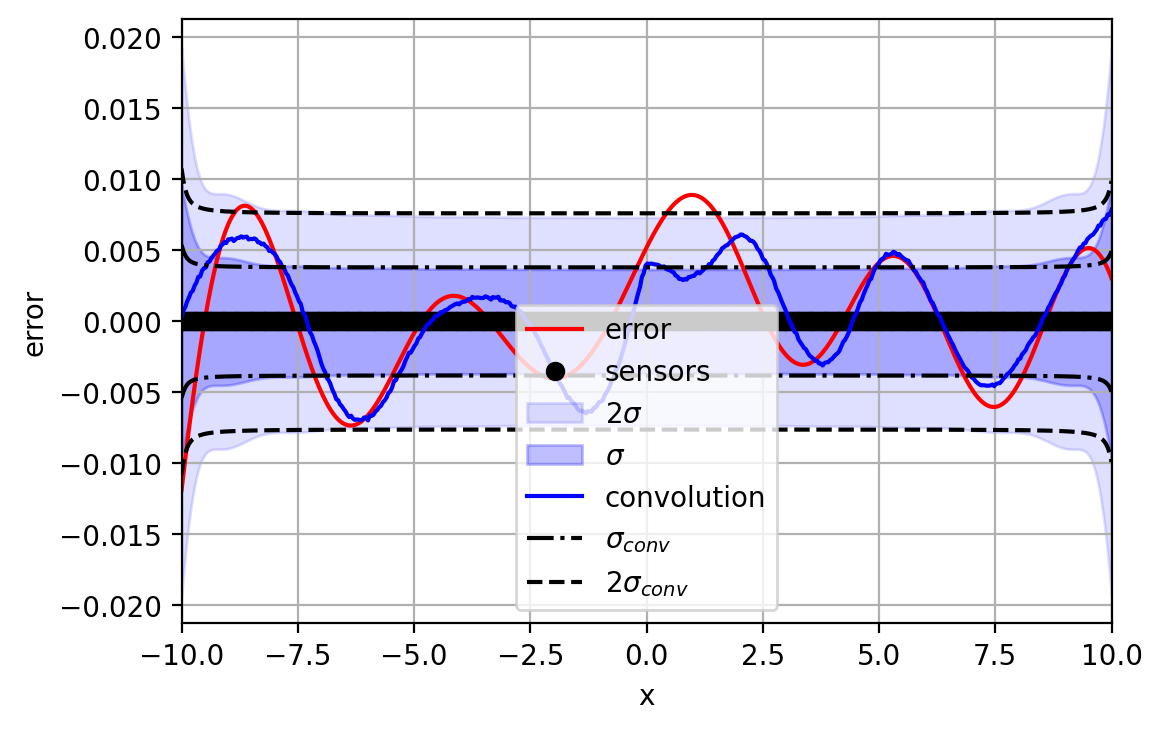

In [344]:
krig1.draw('error', ylabel='error')
plt.plot(sampling, error2, 'b', label='convolution')
#plt.plot(sampling, error0, 'g')
plt.plot(sampling, krig1.error_conv/2, 'k-.', label='$\sigma_{conv}$')
plt.plot(sampling, -krig1.error_conv/2, 'k-.')
plt.plot(sampling, 2 * krig1.error_conv/2, 'k--', label='2$\sigma_{conv}$')
plt.plot(sampling, -2 * krig1.error_conv/2, 'k--')
plt.legend()


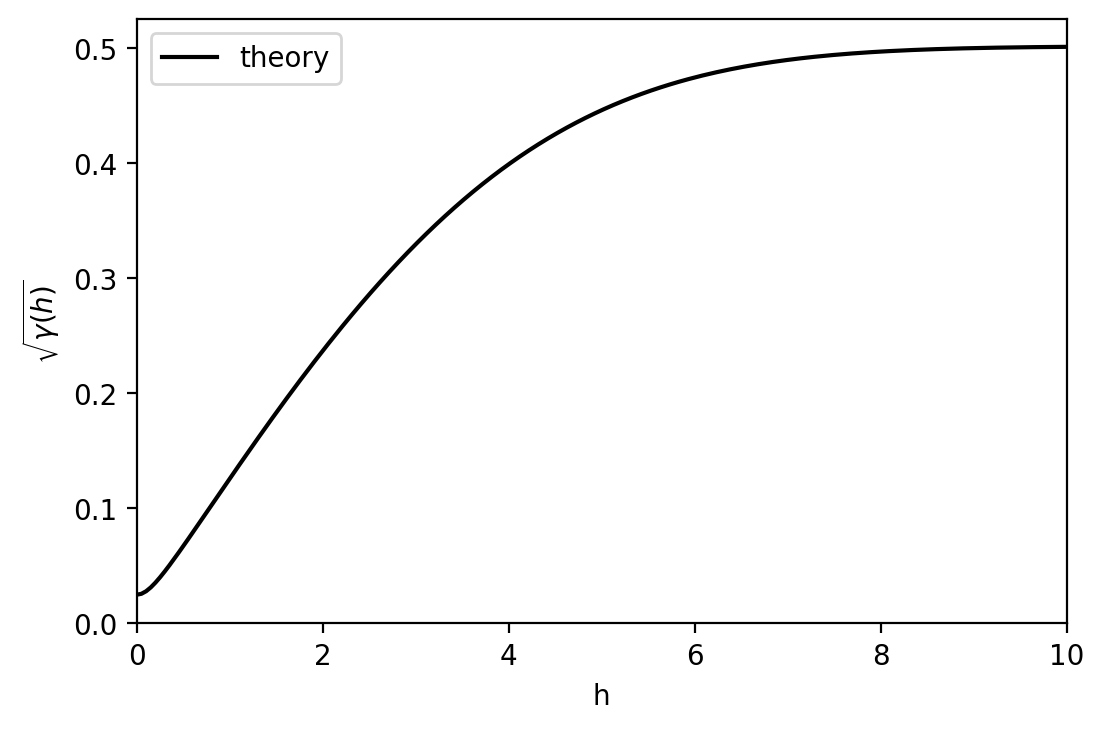

In [345]:
krig1.draw('variogram')

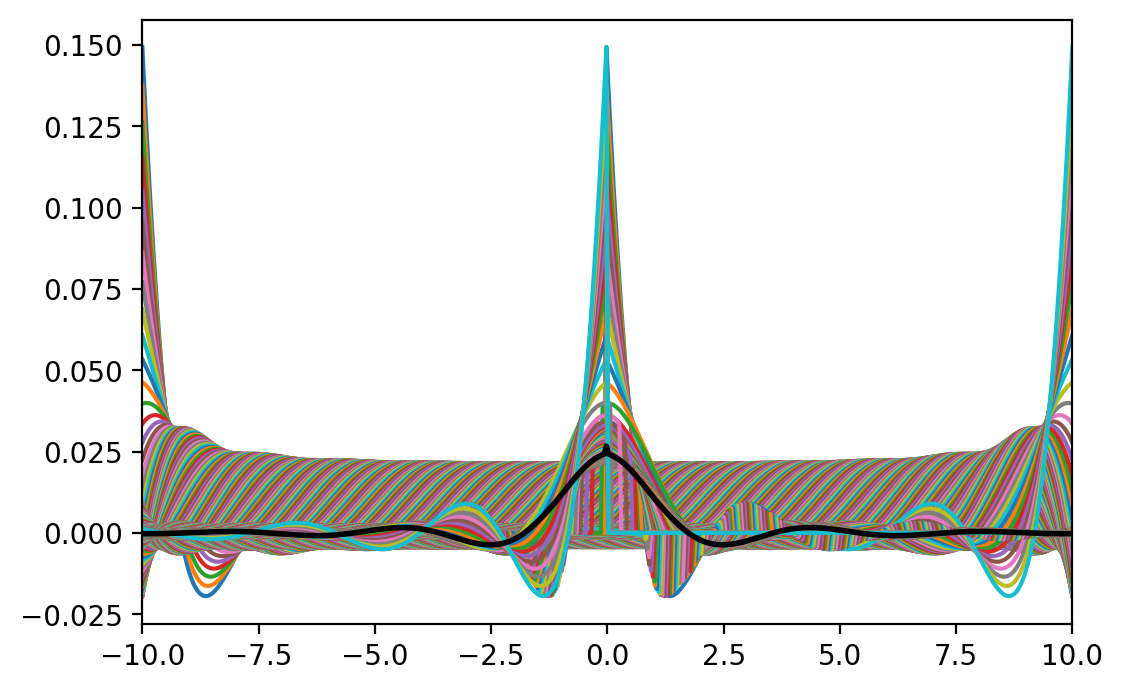

In [346]:
krig1.draw('lambdas')

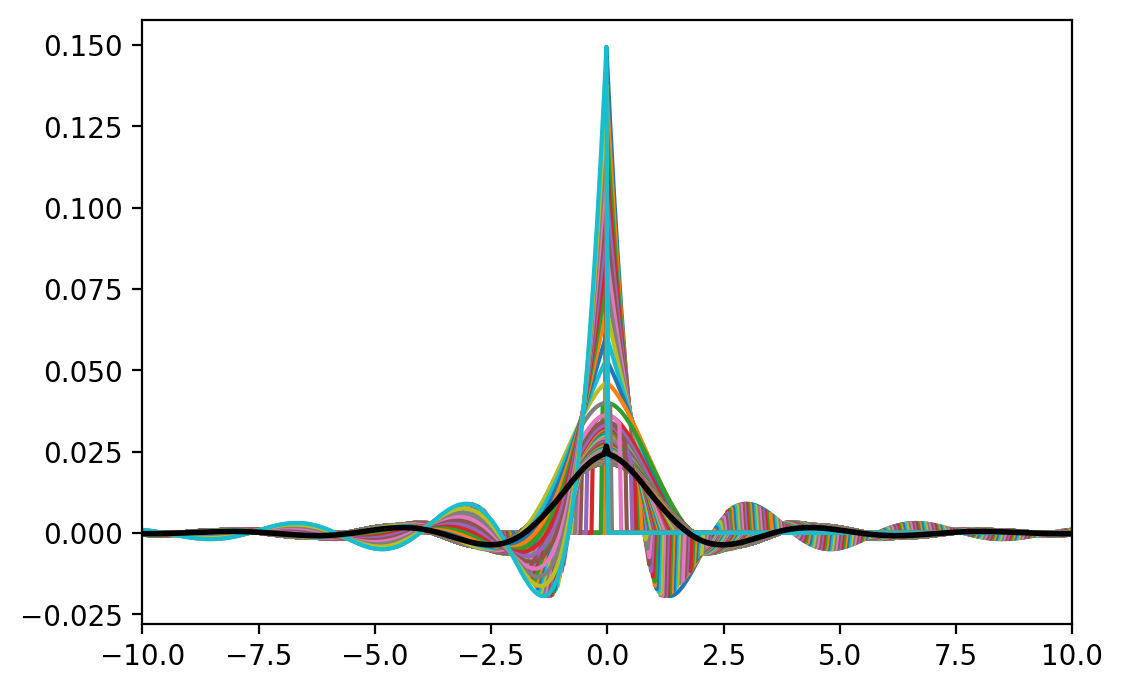

In [347]:
krig1.draw('lambdas_centered')

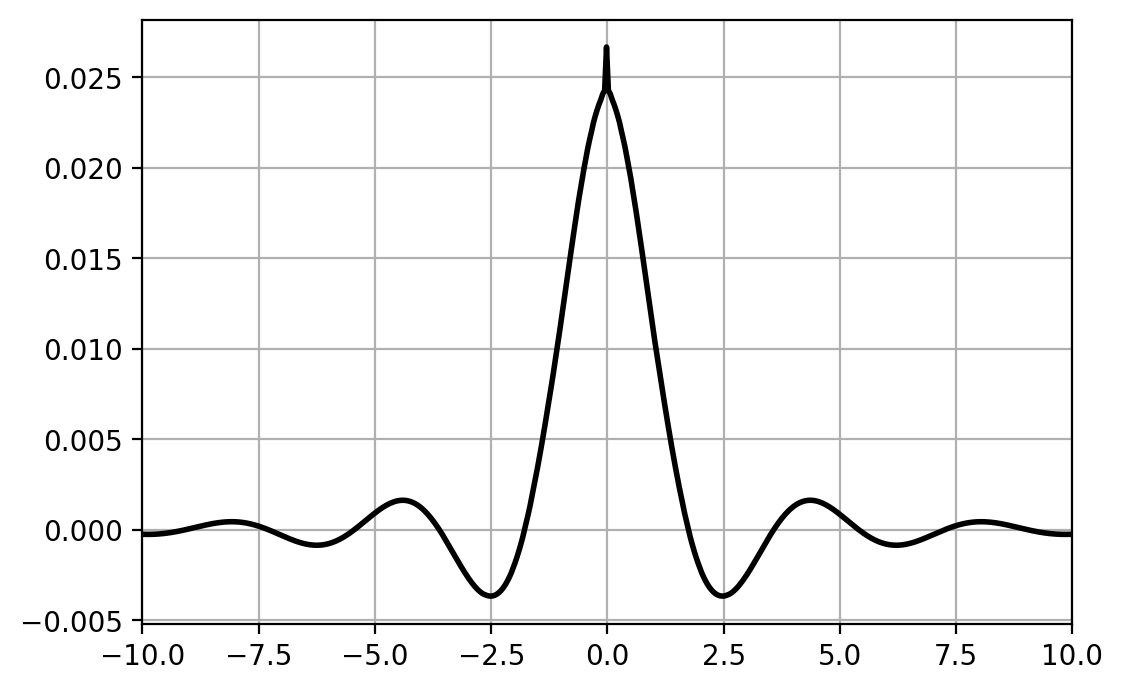

In [348]:
krig1.draw('Lambda')
plt.grid('on')

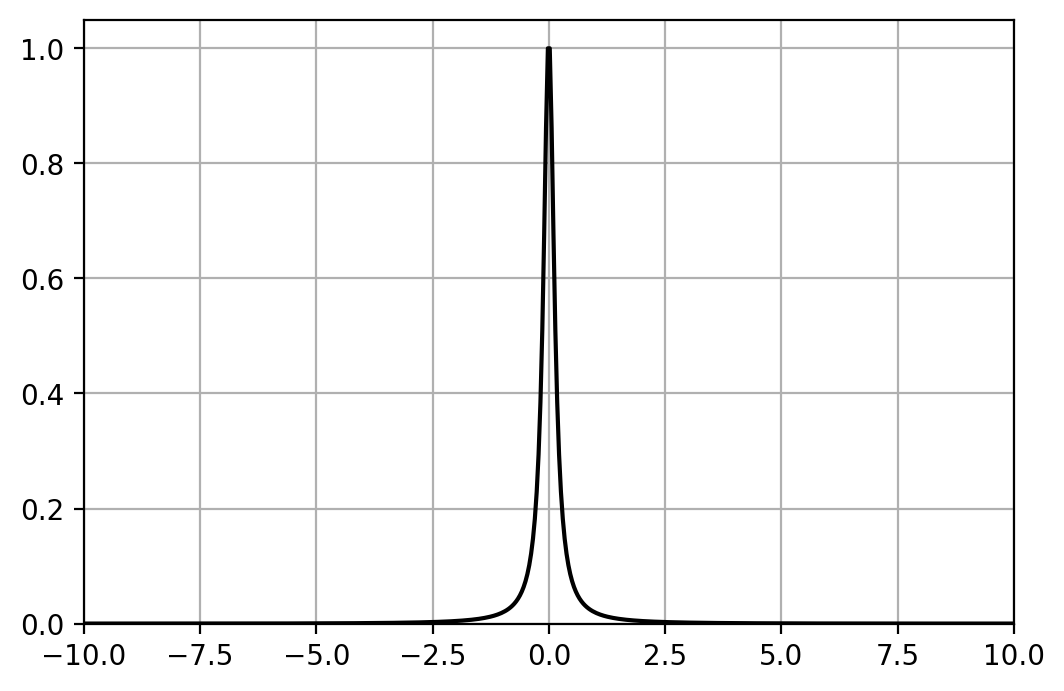

In [349]:
krig1.draw('dm')
plt.grid('on')

### Check $\sum \lambda_s = 1$

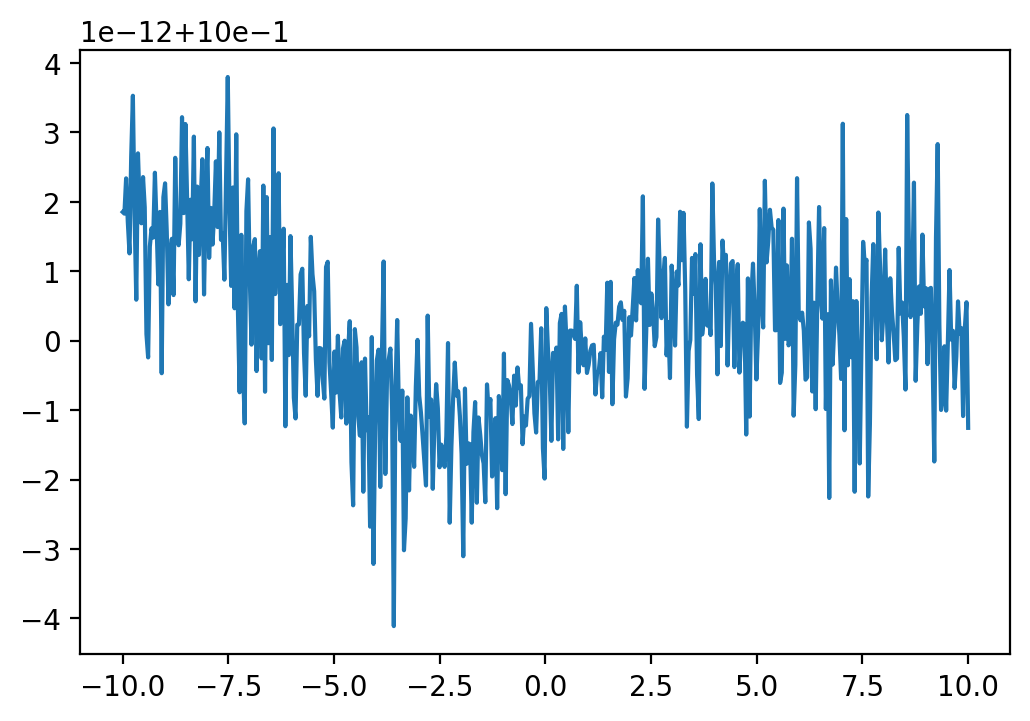

In [350]:
plt.plot(sampling, krig1.lambdas.sum(axis=1))

### development: remove undesired $\lambda(x)$

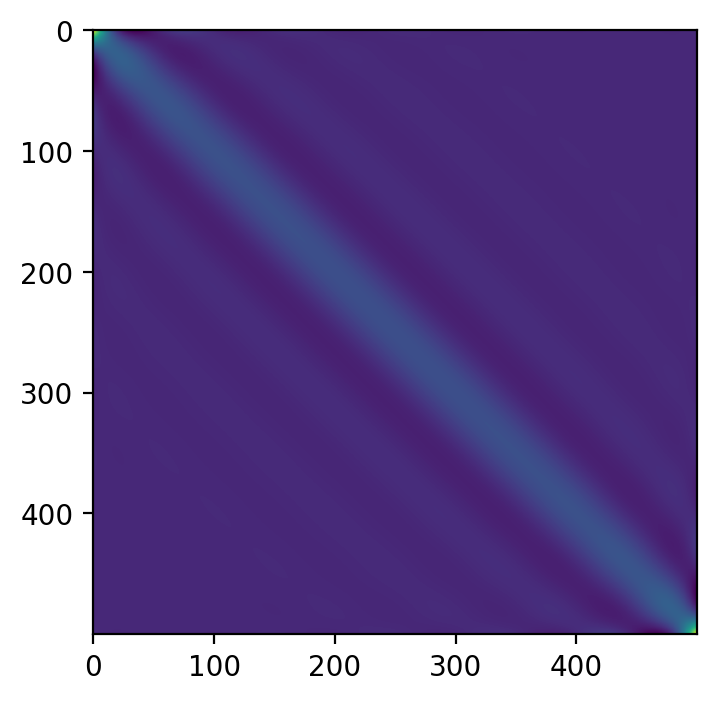

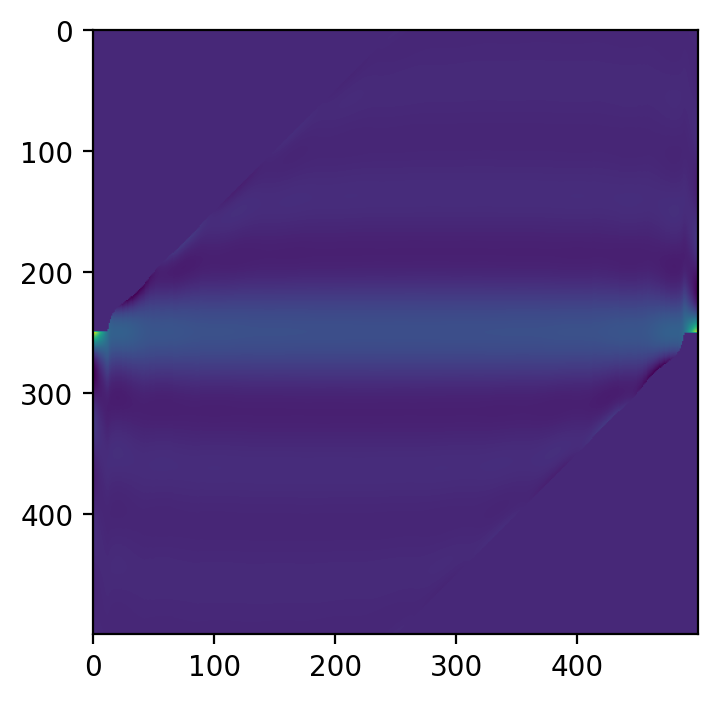

In [351]:
plt.imshow(krig1.lambdas)
plt.figure()
plt.imshow(krig1.lambdas_centered)


(499, 500) (499, 500)


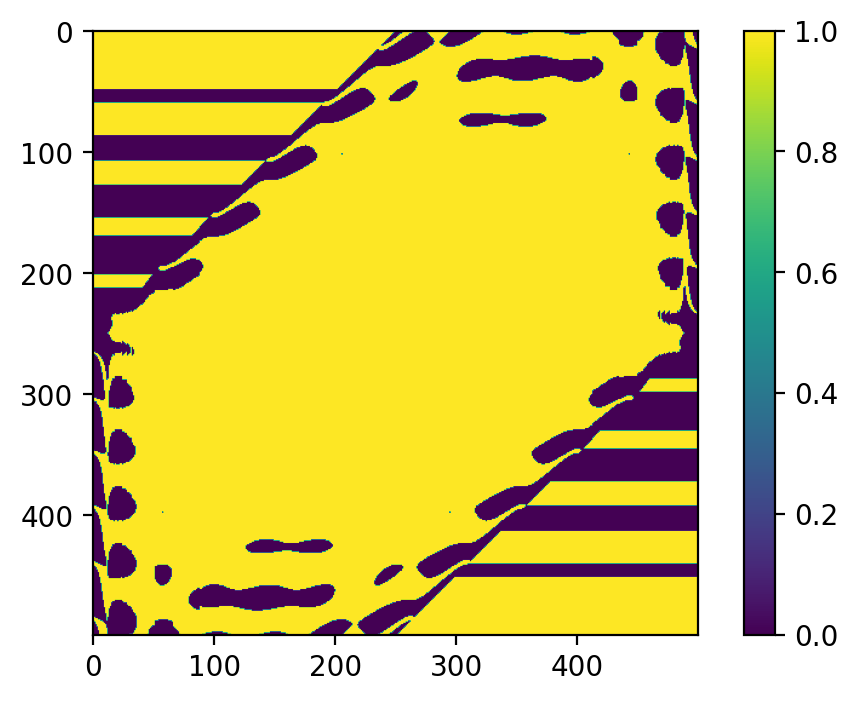

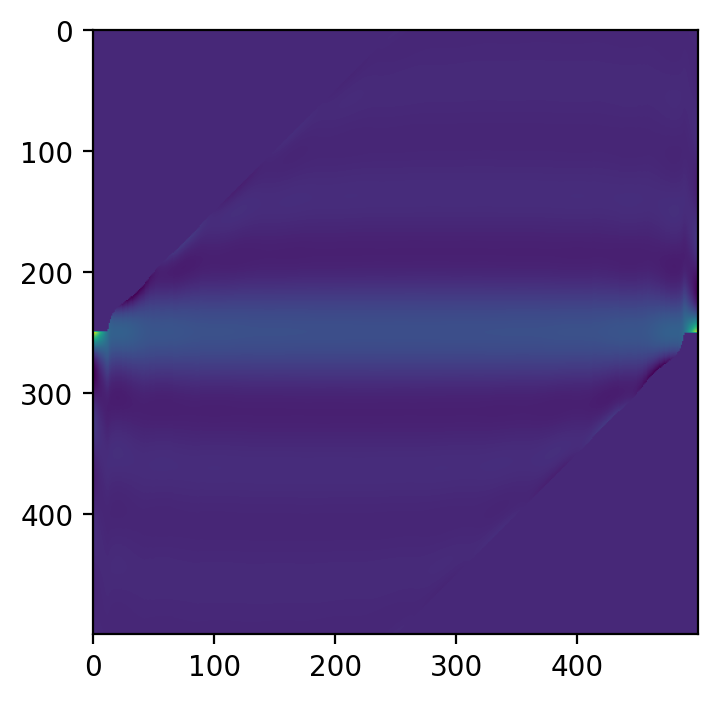

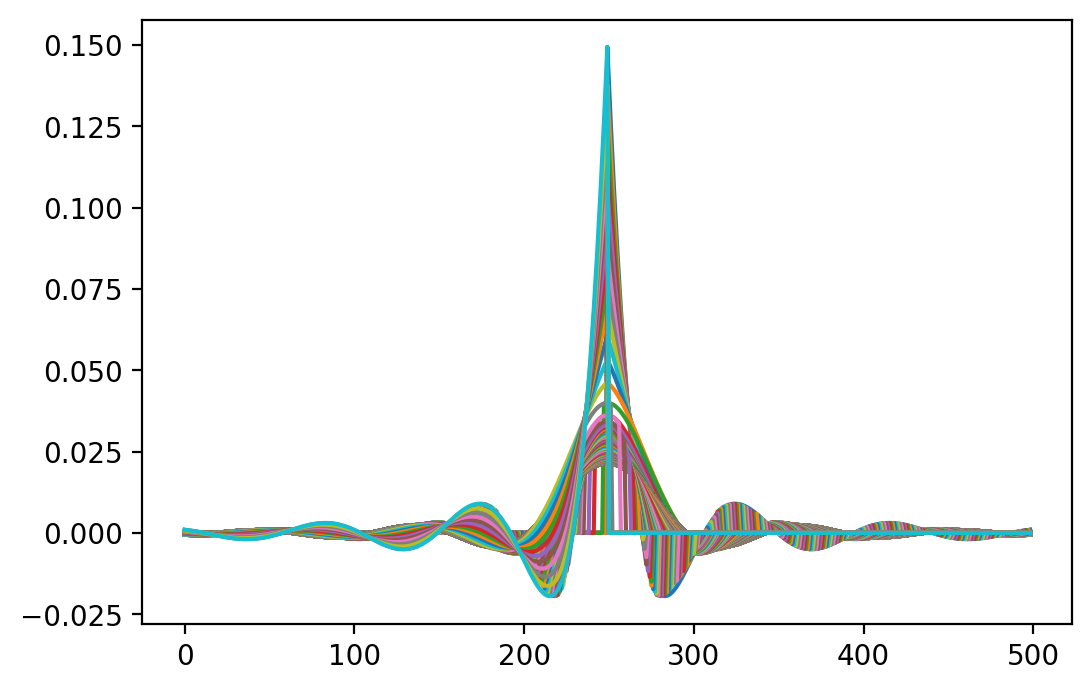

In [352]:

std_lambdas =krig1.lambdas_centered.std(axis=1)
mean_lambdas=krig1.lambdas_centered.mean(axis=1)


oks = np.bitwise_and(
    krig1.lambdas_centered > (mean_lambdas - 1 * std_lambdas)[:, np.newaxis],
    krig1.lambdas_centered < (mean_lambdas + 1 * std_lambdas)[:, np.newaxis])

plt.imshow(oks)
plt.colorbar()
print(oks.shape, krig1.lambdas_centered.shape)

plt.figure()
plt.imshow(krig1.lambdas_centered)

plt.figure()
plt.plot(krig1.lambdas_centered)
